## Exploratory Data Analysis

In [1]:
import json
import pdb
import ast
from tqdm import tqdm

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
DATA_FILE = './sample-data.txt'
with open(DATA_FILE, 'r') as f:
    works = [ast.literal_eval(work) for work in tqdm(f.readlines())]

100%|██████████| 3/3 [00:00<00:00,  9.67it/s]


In [3]:
works_x = [j for i in works for j in i]
df = pd.DataFrame.from_dict(works_x)
print (df.shape)
df.head()

(460, 14)


,id,doi,title,type,publication_date,host_venue,open_access_is_oa,open_access_oa_status,authorships,cited_by_count,concepts,referenced_works,abstract,counts_by_year
0,W2194775991,https://doi.org/10.1109/cvpr.2016.90,Deep Residual Learning for Image Recognition,proceedings-article,2016-06-27,V4306417987,True,green,"[[A2164292938, [I4210164937]], [A2499063207, [...",82989,"[[C155512373, 0.9166446], [C41008148, 0.779227...","[W1536680647, W1677182931, W1903029394, W19328...",Deeper neural networks are more difficult to t...,"[[2022, 11945], [2021, 23636], [2020, 20114], ..."
1,W2311203695,https://doi.org/10.1093/molbev/msw054,MEGA7: Molecular Evolutionary Genetics Analysi...,journal-article,2016-03-22,V57552105,True,bronze,"[[A2149898553, [I185163786]], [A2307130762, [I...",27959,"[[C2776784076, 0.7593913], [C41008148, 0.63809...","[W1519266993, W1992566665, W2034285706, W21032...",Abstract We present the latest version of the ...,"[[2022, 3469], [2021, 5252], [2020, 6079], [20..."
2,W2963341956,https://doi.org/10.18653/v1/n19-1423,None,proceedings-article,2018-10-11,V4306420633,False,closed,"[[A2153797812, [I1291425158]], [A2142444093, [...",20600,"[[C41008148, 0.785668], [C137293760, 0.6452642...","[W131533222, W1486649854, W1566289585, W159901...",We introduce a new language representation mod...,"[[2022, 736], [2021, 9119], [2020, 7596], [201..."
3,W2799524357,https://doi.org/10.1093/molbev/msy096,MEGA X: Molecular Evolutionary Genetics Analys...,journal-article,2018-06-01,V57552105,True,green,"[[A2149898553, [I185163786, I84392919]], [A230...",16432,"[[C2781078984, 0.95899737], [C149810388, 0.721...","[W2097403532, W2121552166, W2156434383, W23112...",The Molecular Evolutionary Genetics Analysis (...,"[[2022, 4753], [2021, 6184], [2020, 3982], [20..."
4,W2963446712,https://doi.org/10.1109/cvpr.2017.243,Densely Connected Convolutional Networks,proceedings-article,2017-07-21,V4306400194,True,green,"[[A2114281204, [I205783295]], [A2566736780, [I...",15939,"[[C41008148, 0.8167397], [C185798385, 0.806655...","[W1677182931, W1903029394, W2097117768, W21020...",Recent work has shown that convolutional netwo...,"[[2022, 2581], [2021, 4523], [2020, 4265], [20..."


In [4]:
# sample row
df.iloc[0]

id                                                             W2194775991
doi                                   https://doi.org/10.1109/cvpr.2016.90
title                         Deep Residual Learning for Image Recognition
type                                                   proceedings-article
publication_date                                                2016-06-27
host_venue                                                     V4306417987
open_access_is_oa                                                     True
open_access_oa_status                                                green
authorships              [[A2164292938, [I4210164937]], [A2499063207, [...
cited_by_count                                                       82989
concepts                 [[C155512373, 0.9166446], [C41008148, 0.779227...
referenced_works         [W1536680647, W1677182931, W1903029394, W19328...
abstract                 Deeper neural networks are more difficult to t...
counts_by_year           

In [5]:
# sample cell
df.iloc[0]['authorships']

[['A2164292938', ['I4210164937']],
 ['A2499063207', ['I4210164937']],
 ['A2119543935', ['I4210164937']],
 ['A2200192130', ['I4210164937']]]

<AxesSubplot:xlabel='count', ylabel='type'>

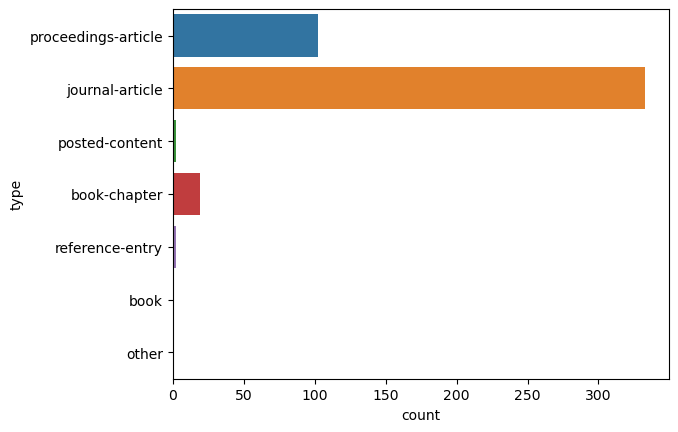

In [6]:
# works by type
sns.countplot(data=df, y='type')

<AxesSubplot:xlabel='year', ylabel='count'>

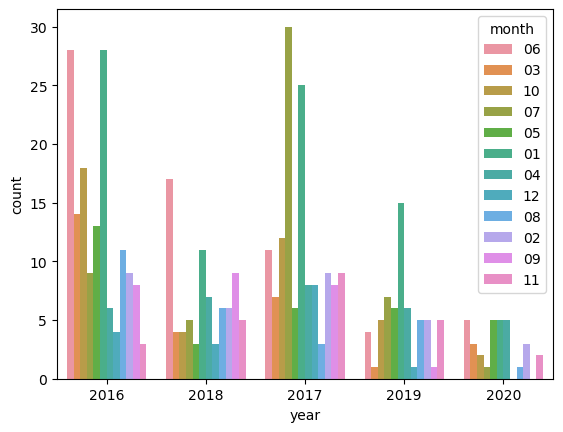

In [7]:
# works by year
df['year'] = df['publication_date'].map(lambda x: x.split('-')[0])
df['month'] = df['publication_date'].map(lambda x: x.split('-')[1])
sns.countplot(data=df, x='year', hue='month')